In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
path= r"C:\Users\DELL\Data-Visualization\train.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Columns: 122 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 200.4+ MB


In [20]:
cols_group1 = ['TARGET','ID' ,'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'
]
df_train = df[cols_group1]


In [21]:
df_train.describe()

,TARGET,ID,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,215258.000000,215258.00000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000
mean,0.080731,107628.50000,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,12.064764
std,0.272422,62139.77646,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,3.264871
min,0.000000,0.00000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000000
25%,0.000000,53814.25000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,107628.50000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,12.000000
75%,0.000000,161442.75000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,14.000000
max,1.000000,215257.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [22]:
df_train.isnull().sum()

TARGET                          0
ID                              0
NAME_CONTRACT_TYPE              0
NAME_TYPE_SUITE               882
WEEKDAY_APPR_PROCESS_START      0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     9
AMT_GOODS_PRICE               174
HOUR_APPR_PROCESS_START         0
dtype: int64

In [23]:
df_train['ID'].value_counts()

ID
196348    1
57538     1
104849    1
26395     1
159713    1
         ..
136545    1
207150    1
41575     1
32747     1
121958    1
Name: count, Length: 215258, dtype: int64

In [24]:
for col in cols_group1:
    print(f'\n -----Tổng giá trị của biến: {df_train[col].value_counts(ascending = False)}')
    


 -----Tổng giá trị của biến: TARGET
0    197880
1     17378
Name: count, dtype: int64

 -----Tổng giá trị của biến: ID
196348    1
57538     1
104849    1
26395     1
159713    1
         ..
136545    1
207150    1
41575     1
32747     1
121958    1
Name: count, Length: 215258, dtype: int64

 -----Tổng giá trị của biến: NAME_CONTRACT_TYPE
Cash loans         194860
Revolving loans     20398
Name: count, dtype: int64

 -----Tổng giá trị của biến: NAME_TYPE_SUITE
Unaccompanied      173985
Family              28107
Spouse, partner      7983
Children             2312
Other_B              1190
Other_A               605
Group of people       194
Name: count, dtype: int64

 -----Tổng giá trị của biến: WEEKDAY_APPR_PROCESS_START
TUESDAY      37724
WEDNESDAY    36270
MONDAY       35566
THURSDAY     35443
FRIDAY       35239
SATURDAY     23737
SUNDAY       11279
Name: count, dtype: int64

 -----Tổng giá trị của biến: AMT_INCOME_TOTAL
135000.0    25090
112500.0    21743
157500.0    18592
180000.0

In [25]:

print("=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===\n")
print(f"Tổng số dòng: {len(df_train):,}")
print(f"Số missing AMT_GOODS_PRICE: {df_train['AMT_GOODS_PRICE'].isnull().sum():,} "
      f"({df_train['AMT_GOODS_PRICE'].isnull().mean()*100:.3f}%)\n")

result = (df_train.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_GOODS        = ('AMT_GOODS_PRICE', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_GOODS    = ('AMT_GOODS_PRICE', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_GOODS'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_GOODS', 'Not_Missing_GOODS', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===

Tổng số dòng: 215,258
Số missing AMT_GOODS_PRICE: 174 (0.081%)

                    Total_rows  Missing_GOODS  Not_Missing_GOODS  \
NAME_CONTRACT_TYPE                                                 
Cash loans              194860              0             194860   
Revolving loans          20398            174              20224   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.000  
Revolving loans               0.853  


In [ ]:
print("=== PHÂN TÍCH MISSING AMT_ANNUITY ===\n")
print(f"Tổng số dòng: {len(df_train):,}")
print(f"Số missing AMT_ANNUITY: {df_train['AMT_ANNUITY'].isnull().sum():,} "
      f"({df_train['AMT_ANNUITY'].isnull().mean()*100:.3f}%)\n")

result = (df_train.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_ANNUITY        = ('AMT_ANNUITY', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_ANNUITY   = ('AMT_ANNUITY', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_ANNUITY'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_ANNUITY', 'Not_Missing_ANNUITY', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_ANNUITY ===

Tổng số dòng: 215,258
Số missing AMT_ANNUITY: 9 (0.004%)

                    Total_rows  Missing_ANNUITY  Not_Missing_ANNUITY  \
NAME_CONTRACT_TYPE                                                     
Cash loans              194860                9               194851   
Revolving loans          20398                0                20398   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.005  
Revolving loans               0.000  


In [27]:
print("TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY\n" + "="*50)

# Tính tỷ lệ TARGET=1 (vỡ nợ) theo từng nhóm
default_rate = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100

for contract_type, rate in default_rate.items():
    count = len(df[df['NAME_CONTRACT_TYPE'] == contract_type])
    bad = df[(df['NAME_CONTRACT_TYPE'] == contract_type) & (df['TARGET'] == 1)].shape[0]
    print(f"{contract_type:15} → {rate:5.2f}% vỡ nợ "
          f"({bad:,} người vỡ nợ / {count:,} người)")

TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY
Cash loans      →  8.34% vỡ nợ (16,242 người vỡ nợ / 194,860 người)
Revolving loans →  5.57% vỡ nợ (1,136 người vỡ nợ / 20,398 người)


### Explain the each features

| Tên biến | Ý nghĩa của biến | Note |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **ID** | Mã định danh duy nhất của mỗi hồ sơ vay                                       | • 100% unique (215258 giá trị khác nhau)<br> |
| **TARGET** | Kết quả cuối cùng ngân hàng quan tâm nhất:<br>• 0 = khách hàng trả nợ đúng hạn<br>• 1 = khách hàng bị trễ nợ quá X ngày trong Y kỳ đầu | • Là biến mục tiêu cần dự đoán<br> |
| **NAME_CONTRACT_TYPE** | Loại khoản vay mà khách hàng chọn:<br>• Cash loans = vay tiền mặt, cầm tiền về xài<br>• Revolving loans = giống thẻ tín dụng, có hạn mức rút dần |• Cash loans chiếm ~90–91%<br>• Revolving loans có tỷ lệ vỡ nợ thấp hơn hẳn (~5–6% so với ~8–9% của Cash loans) → biến mạnh |
| **AMT_INCOME_TOTAL** | Thu nhập hàng tháng do khách hàng tự khai (bao gồm lương, kinh doanh, cho thuê…) | • Bị lệch phải cực mạnh (max = 117 triệu!)<br>• Người default thường thu nhập thấp hơn 20–30%<br>• Bắt buộc log transform<br>• Nên tạo tỷ lệ với CREDIT/ANNUITY |
| **AMT_CREDIT** | Số tiền ngân hàng thực tế duyệt và cho vay (sau khi xét hồ sơ) | • Bị lệch phải mạnh<br>• Người default thường được duyệt ít tiền hơn<br>• Tỷ lệ CREDIT/INCOME là một trong những feature mạnh nhất cuộc thi |
| **AMT_ANNUITY** | Số tiền khách phải trả cố định mỗi tháng (gồm cả gốc và lãi) | • Bị lệch phải<br>• Tỷ lệ ANNUITY/INCOME (gánh nặng trả góp) là feature cực mạnh<br>• Càng cao → càng dễ vỡ nợ |
| **AMT_GOODS_PRICE** | Giá trị món hàng mà khách định mua bằng tiền vay (tivi, tủ lạnh, điện thoại…). `Nếu vay tiền mặt thì thường bằng hoặc gần bằng AMT_CREDIT` | • Missing value là do customer dùng khoản vay revolving nên sẽ không đánh giá được việc customer đó sẽ sử dụng số tiền đó cho mục đích gì-> giá trị món hàng không được ghi nhận |
| **NAME_TYPE_SUITE** | Khi nộp hồ sơ, khách đi một mình hay có người đi cùng? (Unaccompanied, Family, Spouse, Children, Group of people…) | • Missing value có thể là do khách hàng đăng nhập bằng trực tuyến(online, ATM,... ) hoặc là không đi cùng ai nên để trống |
| **WEEKDAY_APPR_PROCESS_START** | Thứ trong tuần mà khách đến nộp hồ sơ (MONDAY → SUNDAY) | • 7 giá trị<br>• Chênh lệch tỷ lệ default giữa các thứ rất nhỏ (< 0.5%)|
| **HOUR_APPR_PROCESS_START** | Giờ trong ngày (0–23h) mà khách nộp hồ sơ | • Giờ quá sớm (< 7h) hoặc quá muộn (> 18h) có tỷ lệ default cao hơn nhẹ<br>• Nên chia bin: sáng (7–12), chiều (12–18), tối (sau 18h) hoặc cyclic encoding |


#### XỬ LÍ MISSING VALUE

In [ ]:
df_train = df[cols_group1].copy()
#1 NAME_TYPE_SUITE - missing 882 giá trị(MAR))
df_train['NAME_TYPE_SUITE_MISSING'] = df_train['NAME_TYPE_SUITE'].isnull().astype(int)
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE'].fillna('Unknown') 

# 2. AMT_GOODS_PRICE – missing(MCAR) 174 giá trị
df_train['GOODS_PRICE_WAS_MISSING'] = df_train['AMT_GOODS_PRICE'].isnull().astype(int)
df_train['AMT_GOODS_PRICE'] = df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_CREDIT'])

# 3. AMT_ANNUITY – chỉ 9 giá trị missing(MCAR) → fill median
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].fillna(df_train['AMT_ANNUITY'].median())

# Kiểm tra lại 
print("Số missing sau khi xử lý:")
print(df_train.isnull().sum())

Số missing sau khi xử lý:
TARGET                        0
ID                            0
NAME_CONTRACT_TYPE            0
NAME_TYPE_SUITE               0
WEEKDAY_APPR_PROCESS_START    0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
HOUR_APPR_PROCESS_START       0
NAME_TYPE_SUITE_MISSING       0
GOODS_PRICE_WAS_MISSING       0
dtype: int64


#### XỬ LÍ OUTLIER

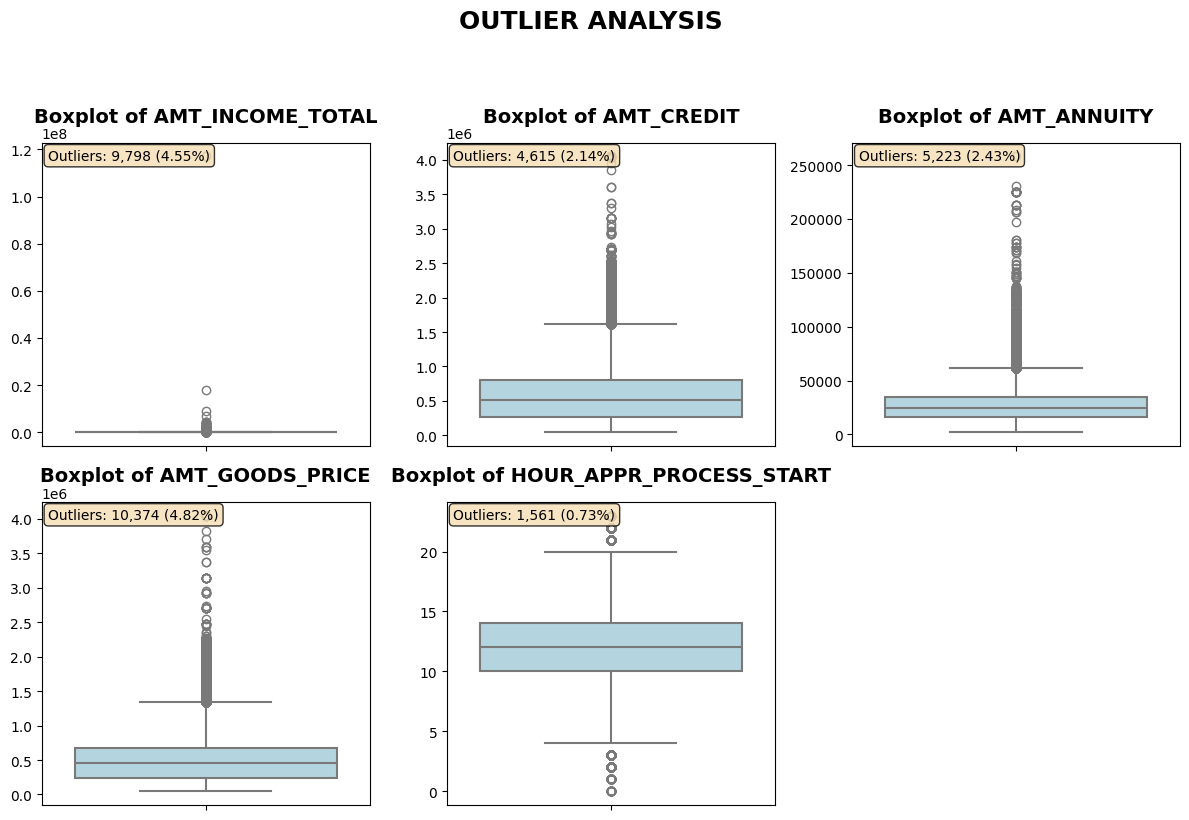

In [32]:
# Danh sách 5 biến số cần kiểm tra outlier
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']

plt.figure(figsize=(12, 8))

# Vẽ boxplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_train[col], color='lightblue', linewidth=1.5)
    
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold', pad=15)
    plt.ylabel('')
    plt.xlabel('')

    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col].count()
    total = len(df_train[col])
    
    plt.text(0.02, 0.98, f'Outliers: {outliers_count:,} ({100*outliers_count/total:.2f}%)', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.suptitle('OUTLIER ANALYSIS \n', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**Nhận xét:**
* `AMT_INCOME_TOTAL`: có một số khách hàng siêu giàu(doanh nhân lớn)-> Outlier nằm rất xa-> Giữ lại các vị khách này vì thường là khách VIP, thường có tỉ lệ vỡ nợ thấp hơn
* `AMT_CREDIT`: khoản vay cực lớn, thường là mua nhà, xe sang hoặc doanh nghiệp nhỏ vay vốn
* `AMT_GOODS_PRICE`: tương tự AMT_CREADIT, nhưng outlier có nhiều hơn một chút do có vài trường hợp giá hàng hóa bị ghi nhầm hoặc thực sự đắt đỏ
* `HOUR_APPR_PROCESS_START`: giờ nộp hồ sơ bất thường(0h-ah sáng)-> Đây là hành vi đáng nghi liên quan đến hành vi gian lận

Không sử dụng được IQR vì nó xóa hoặc cắt nhầm dữ liệu-> không phản ảnh được thực tế dữ liệu

In [34]:
# 1. Dùng threshold 
caps = {
    'AMT_INCOME_TOTAL' : np.percentile(df['AMT_INCOME_TOTAL'], 99.5),   
    'AMT_CREDIT'       : np.percentile(df['AMT_CREDIT'], 99.5),        
    'AMT_ANNUITY'      : np.percentile(df['AMT_ANNUITY'], 99.5),       
    'AMT_GOODS_PRICE'  : np.percentile(df['AMT_GOODS_PRICE'], 99.5),   
}

# 2. Winsorize (cắt ngọn)(mọi giá trị lớn hơn threshold bị ép xuống bằng threshols) + tạo flag outlier (rất quan trọng!)
for col, threshold in caps.items():
    df[f'{col}_outlier'] = (df[col] > threshold).astype(int)   # flag: giữ lại thông tin nguwofi này là từng là cực giàu/ vay cực lớn
    df[col] = df[col].clip(upper=threshold)                    # clip: loại bỏ những giá trị cực đoan

#### DISTRIBUTION

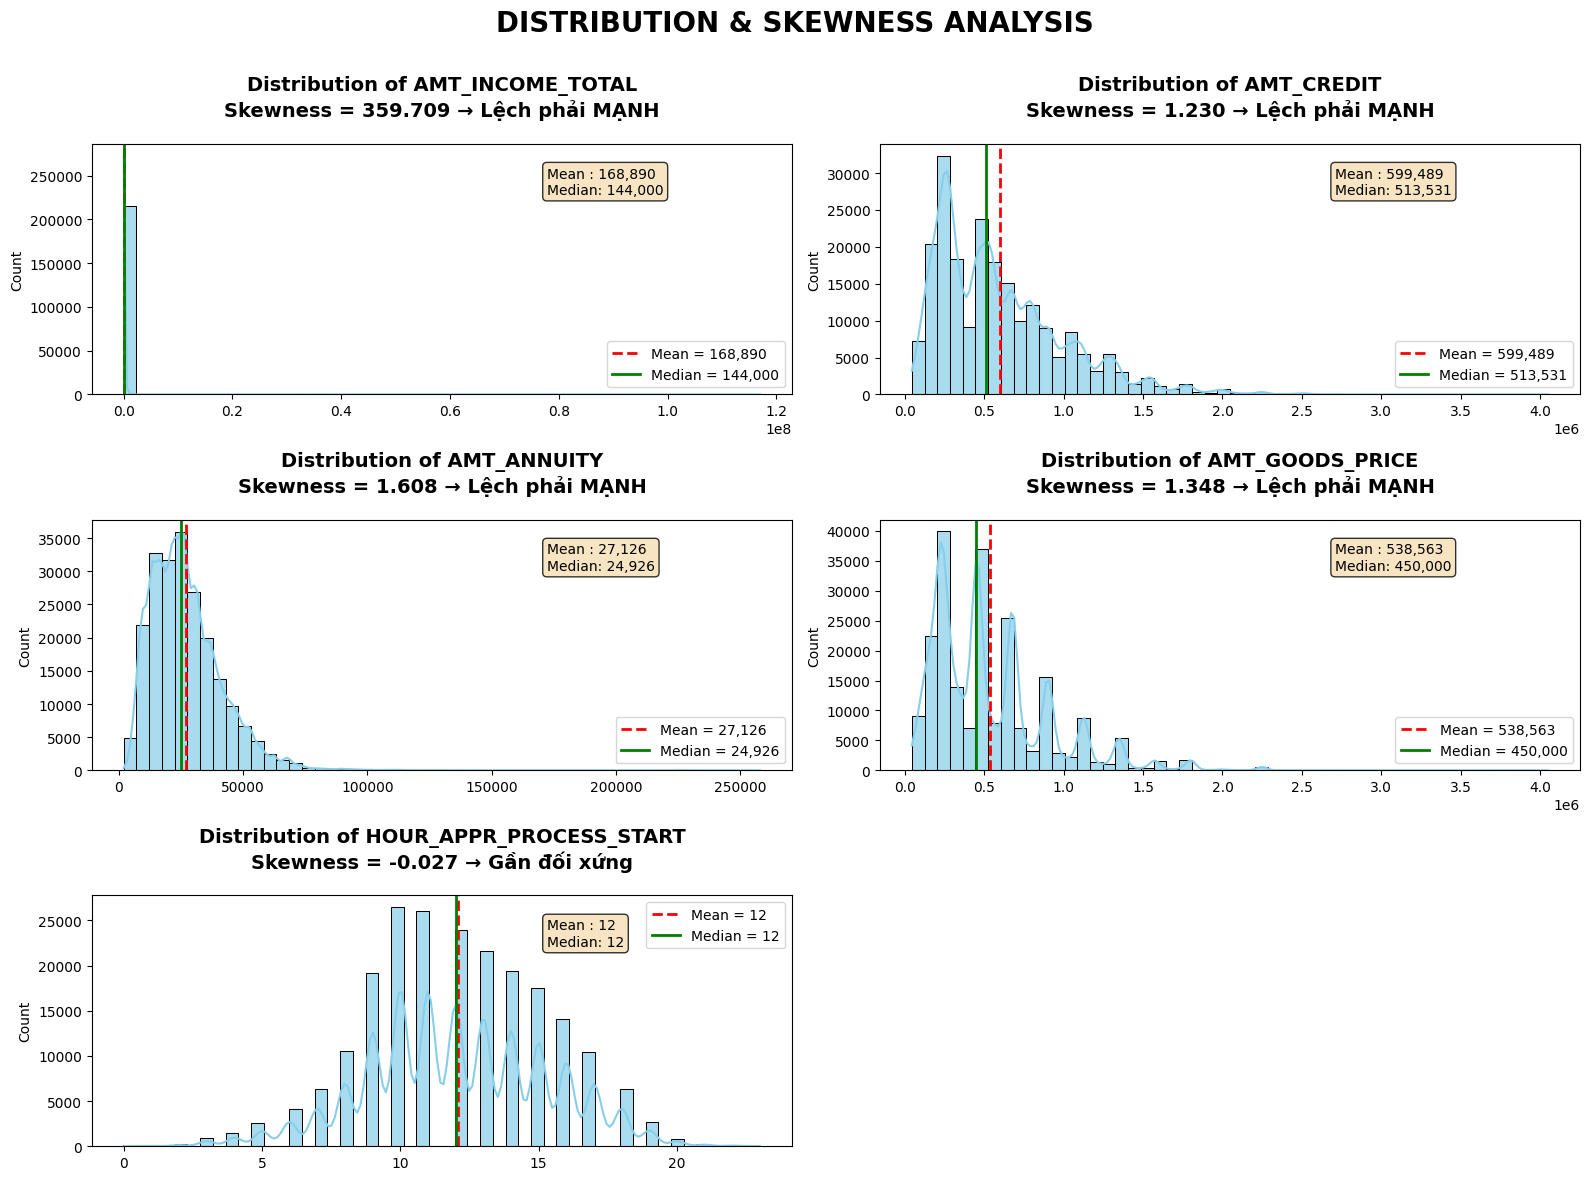

In [36]:
import numpy as np
from scipy.stats import skew

num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
            'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    
    # Vẽ histogram + KDE
    sns.histplot(data=df_train, x=col, kde=True, 
                 color='skyblue', edgecolor='black', alpha=0.7, bins=50)
    
    # Tính skewness
    skewness = skew(df_train[col].dropna())
    skew_text = f'Skewness = {skewness:.3f}'
    if skewness > 1:
        skew_text += ' → Lệch phải MẠNH'
    elif skewness > 0.5:
        skew_text += ' → Lệch phải vừa'
    elif skewness < -0.5:
        skew_text += ' → Lệch trái'
    else:
        skew_text += ' → Gần đối xứng'
    
    # Đánh dấu mean & median
    mean_val = df_train[col].mean()
    median_val = df_train[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:,.0f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median = {median_val:,.0f}')
    
    plt.title(f'Distribution of {col}\n{skew_text}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(fontsize=10)
    
    # Thêm text thống kê
    plt.text(0.65, 0.80, f'Mean : {mean_val:,.0f}\nMedian: {median_val:,.0f}', 
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.suptitle('DISTRIBUTION & SKEWNESS ANALYSIS\n', 
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


#### TÍNH CORRELATION MATRIX

Text(0.5, 1.0, 'Correlation Matrix')

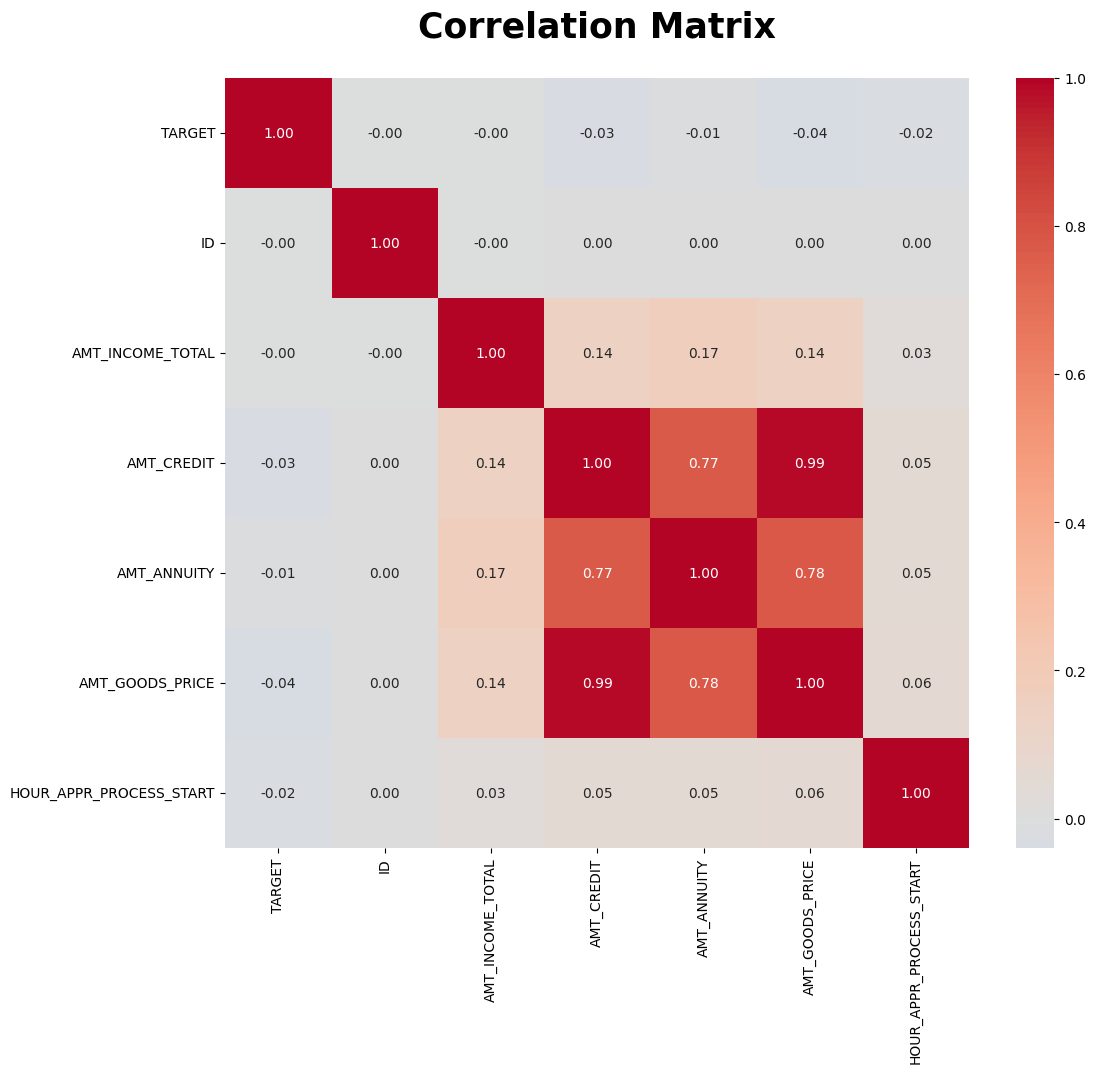

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.select_dtypes(include=['float64', 'int64']).corr(),
             annot=True,
             fmt=".2f",
             center= 0,
             cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25
          ,fontweight='bold',pad=30)
